In [1]:
from pynq.overlays.base import BaseOverlay
base = BaseOverlay("base.bit")

In [2]:
from pynq.lib.arduino import Arduino_Zsprinter
arduino = Arduino_Zsprinter(base.ARDUINO)

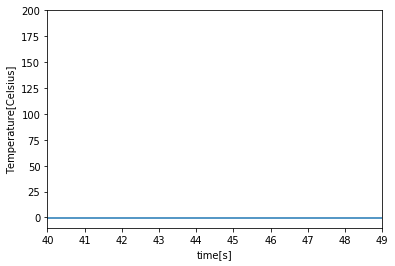

KeyboardInterrupt: 

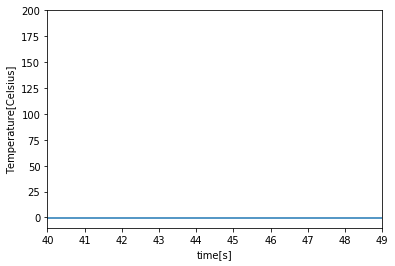

In [3]:
%matplotlib inline
import matplotlib.pyplot as plt
from IPython import display
import numpy as np
import time
ts = np.zeros(10)
ys = np.zeros(10)
t = 1
plt.ion()
plt.figure()
plt.show()
li, = plt.plot(ts, ys)
plt.ylim(-10, 200)
plt.xlabel("time[s]")
plt.ylabel("Temperature[Celsius]")
while True:
    ts = np.append(ts,t)
    ts = np.delete(ts, 0)
    t += 1
    arduino.write("M105\n")
    y = arduino.read_hotend_temp()
    ys = np.append(ys,y)
    ys = np.delete(ys, 0)
    li.set_xdata(ts)
    li.set_ydata(ys)         
    plt.xlim(min(ts), max(ts))
    plt.draw()
    display.clear_output(wait=True)
    display.display(plt.gcf())
    time.sleep(1)

In [11]:
arduino.read_hotend_temp()

-1.0

In [3]:
arduino.write("M105\n")

In [4]:
arduino.read_hotend_temp()

-1.0

In [14]:
arduino.read_current_position()

[0.0, 0.0, 0.0, 0.0]

In [15]:
arduino.write("M114\n")

In [16]:
arduino.read_current_position()

[0.0, 0.0, 0.0, 0.0]

In [ ]:
import time
BUFSIZE = 6
FAST_DELAY_TIME = 0.01

with open('data/octo.gcode') as file:
    lines = file.readlines()
    line_number = 0
    buflen_accum_last = 0
    buflen_accum = 0   
    bufdiff = 0
    buflen_accum_finished = 0
    buflen_accum_finished_last = 0
    buflen_accum_finished_diff = 0
    
    for idx,line in enumerate(lines):
        cmd = line.strip()+'\n'
        if(cmd[0]==';'):
            continue
        print(idx,line.strip())
        buflen_accum = int(arduino.read_buflen_accum()[0])
        buflen = int(arduino.read_buflen()[0])
        bufdiff = int(buflen_accum)-int(buflen_accum_last)
        arduino.write(cmd)
        cnt=0
        while(bufdiff<1):
            next_buffer_head = int(arduino.read_next_buffer_head()[0])
            buflen_accum_last = buflen_accum
            buflen_accum = int(arduino.read_buflen_accum()[0])
            bufdiff = int(buflen_accum)-int(buflen_accum_last)
            time.sleep(FAST_DELAY_TIME)
            cnt += 1
        cnt=0
        buflen = int(arduino.read_buflen()[0])
        buflen_accum_finished = int(arduino.read_buflen_accum_finished()[0])
        if(buflen>=(BUFSIZE-1)):
            while True:
                time.sleep(FAST_DELAY_TIME)
                buflen_accum_finished_last = buflen_accum_finished
                buflen_accum_finished = int(arduino.read_buflen_accum_finished()[0])
                buflen_accum_finished_diff = int(buflen_accum_finished)-int(buflen_accum_finished_last)
                buflen = int(arduino.read_buflen()[0])
                next_buffer_head = int(arduino.read_next_buffer_head()[0])
                if(buflen_accum_finished_diff>0):
                    break                
                cnt += 1
        print()

print("done")

201 G28 ; home all axes

206 G1 E-6.4000 F3900

207 G1 Z0.500 F9000

213 G1 X-1.423 Y-5.302 F9000

214 G1 Z0.000 F9000

215 G1 E-0.6000 F1170

217 G1 X-1.178 Y-5.414 Z0.000 E0.0063 F405

218 G1 X-0.939 Y-5.576 Z0.000 E0.0131

219 G1 X-0.693 Y-5.790 Z0.001 E0.0208

220 G1 X-0.488 Y-6.006 Z0.002 E0.0278

221 G1 X-0.300 Y-6.235 Z0.002 E0.0349

222 G1 X0.378 Y-7.149 Z0.003 E0.0622

223 G1 X0.749 Y-7.560 Z0.005 E0.0755

224 G1 X1.116 Y-7.907 Z0.006 E0.0878

225 G1 X1.537 Y-8.267 Z0.007 E0.1013

226 G1 X2.214 Y-8.785 Z0.008 E0.1222

227 G1 X2.516 Y-8.985 Z0.009 E0.1311

228 G1 X2.862 Y-9.184 Z0.010 E0.1410


In [ ]:
import time
BUFSIZE = 6
DELAY_TIME = 0.1
FAST_DELAY_TIME = 0.01
FIRST_DELAY_TIME = 0.1

with open('data/octo.gcode') as file:
#with open('data/20mm_cube.gcode') as file:
    lines = file.readlines()
    line_number = 0
    buflen_accum_last = 0
    buflen_accum = 0   
    bufdiff = 0
    buflen_accum_finished = 0
    buflen_accum_finished_last = 0
    buflen_accum_finished_diff = 0
    
    for idx,line in enumerate(lines):
        cmd = line.strip()+'\n'
        if(cmd[0]==';'):
            continue
        print(idx,line.strip())
        buflen_accum = int(arduino.read_buflen_accum()[0])
        buflen = int(arduino.read_buflen()[0])
        bufdiff = int(buflen_accum)-int(buflen_accum_last)
        arduino.write(cmd)
        cnt=0
        while(bufdiff<1):
            next_buffer_head = int(arduino.read_next_buffer_head()[0])
            buflen_accum_last = buflen_accum
            buflen_accum = int(arduino.read_buflen_accum()[0])
            bufdiff = int(buflen_accum)-int(buflen_accum_last)
            time.sleep(FAST_DELAY_TIME)
            #print('.',end='')
            if(cnt%1000==0):
                print('buflen:',arduino.read_buflen()[0],end='')
                print(', buflen_accum',buflen_accum,end='')
                print(', bufdiff',bufdiff,end='')
                print('next_buffer_head:',next_buffer_head,end='')
                print()
            cnt += 1
        cnt=0
        buflen = int(arduino.read_buflen()[0])
        buflen_accum_finished = int(arduino.read_buflen_accum_finished()[0])
        print('buflen:',arduino.read_buflen()[0],end='')
        print(', buflen_accum_finished:',buflen_accum_finished,end='')
        print()
        if(buflen>=(BUFSIZE-1)):
            while True:
                time.sleep(FAST_DELAY_TIME)
                buflen_accum_finished_last = buflen_accum_finished
                buflen_accum_finished = int(arduino.read_buflen_accum_finished()[0])
                buflen_accum_finished_diff = int(buflen_accum_finished)-int(buflen_accum_finished_last)
                buflen = int(arduino.read_buflen()[0])
                next_buffer_head = int(arduino.read_next_buffer_head()[0])
#                 if(buflen<(BUFSIZE-1)):
#                     print("buflen freeed")
#                     break                                
                if(buflen_accum_finished_diff>0):
                    print("ISR finished")
                    break                
                if(cnt%1000==0):
                    print('buflen:',arduino.read_buflen()[0],end='')
                    print(', buflen_accum',buflen_accum,end='')
                    print(', bufdiff',bufdiff,end='')
                    print(', buflen_accum_finished:',buflen_accum_finished,end='')
                    print(', buflen_accum_finished_diff:',buflen_accum_finished_diff,end='')
                    print(', next_buffer_head:',next_buffer_head,end='')
                    print()
                cnt += 1
        print()
        #buflen_accum_last = buflen_accum

print("done")

In [ ]:
import time
BUFSIZE = 6
DELAY_TIME = 0.1
FAST_DELAY_TIME = 0.005
FIRST_DELAY_TIME = 0.1

with open('data/octo.gcode') as file:
#with open('data/20mm_cube.gcode') as file:
    lines = file.readlines()
    line_number = 0
    buflen_accum_last = 0
    buflen_accum = 0   
    for idx,line in enumerate(lines):
        cmd = line.strip()+'\n'
        if(cmd[0]==';'):
            continue
        print(idx,line.strip())
        buflen_accum = int(arduino.read_buflen_accum()[0])
        buflen = int(arduino.read_buflen()[0])
        bufdiff = int(buflen_accum)-int(buflen_accum_last)
        arduino.write(cmd)
        cnt=0
        while(bufdiff<1):
            buflen_accum_last = buflen_accum
            buflen_accum = int(arduino.read_buflen_accum()[0])
            bufdiff = int(buflen_accum)-int(buflen_accum_last)
            time.sleep(FAST_DELAY_TIME)
            #print('.',end='')
            if(cnt%100==0):
                print('buflen:',arduino.read_buflen()[0],end='')
                print(', buflen_accum',buflen_accum,end='')
                print(', bufdiff',bufdiff,end='')
                print()
            cnt += 1
        cnt=0
        buflen = int(arduino.read_buflen()[0])
        buflen_accum_finished = int(arduino.read_buflen_accum_finished()[0])
        print('buflen:',arduino.read_buflen()[0],end='')
        print(', buflen_accum_finished:',buflen_accum_finished,end='')
        print()
        if(buflen>=(BUFSIZE-1)):
            while True:
                time.sleep(FAST_DELAY_TIME)
                buflen_accum_finished_last = buflen_accum_finished
                buflen_accum_finished = int(arduino.read_buflen_accum_finished()[0])
                buflen_accum_finished_diff = int(buflen_accum_finished)-int(buflen_accum_finished_last)
                buflen = int(arduino.read_buflen()[0])
                if(buflen<(BUFSIZE-1)):
                    print("buflen freeed")
                    break                                
                if(buflen_accum_finished_diff>0):
                    print("ISR finished")
                    break                
                if(cnt%1000==0):
                    print('buflen:',arduino.read_buflen()[0],end='')
                    print(', buflen_accum',buflen_accum,end='')
                    print(', bufdiff',bufdiff,end='')
                    print(', buflen_accum_finished:',buflen_accum_finished,end='')
                    print(', buflen_accum_finished_diff:',buflen_accum_finished_diff,end='')
                    print()
                cnt += 1
        print()
        #buflen_accum_last = buflen_accum

print("done")

In [ ]:
g28 = "G28\n"
gcode = "G1 X1 Y2\n"
gcode1 = "G1 X2 Y4\n"
gcode2 = "G1 X3 Y6\n"
gcode3 = "G1 X0.3 Y0.6\n"
gcode4 = "G1 Z100\n"
gcode_comment = "; G-Code generated by Simplify3D(R) Version 4.0.0\n"
hoge = "G28 ; home all axes\n"
first = 'G28\n';
second = 'G1 Z0.325 F3000\n'
gcodes = [gcode,gcode1,gcode2]

In [ ]:
arduino.write(g28)

In [ ]:
import re
import sys
import pdb
from math import sqrt
import time

g0pattern = r"^G0.*"
g1pattern = r"^G1.*"
g0re = re.compile(g0pattern)
g1re = re.compile(g1pattern)

Xpattern = r".*X[-\.\d]+"
Ypattern = r".*Y[-\.\d]+"
Zpattern = r".*Z[-\.\d]+"
Fpattern = r".*F\d+"
Xre = re.compile(Xpattern)
Yre = re.compile(Ypattern)
Zre = re.compile(Zpattern)
Fre = re.compile(Fpattern)
BUFSIZE = 6
MINIMUM_DELAY_TIME = 0.3

In [ ]:
def parse(line,BUFSIZE,cnt,currentX,currentY,currentZ,currentF):
    if Xre.match(line): 
        nextX = float(re.findall(Xpattern,line)[0].split('X')[1])
    else:
        nextX = currentX
    if Yre.match(line): 
        nextY = float(re.findall(Ypattern,line)[0].split('Y')[1])
    else:
        nextY = currentY
    if Zre.match(line):
        nextZ = float(re.findall(Zpattern,line)[0].split('Z')[1])           
    else:
        nextZ = currentZ
    if Fre.match(line):
        nextF = float(re.findall(Fpattern,line)[0].split('F')[1])
    else:
        nextF = currentF
    dr = sqrt((nextX-currentX)**2+(nextY-currentY)**2+(nextZ-currentZ)**2)
    v = currentF/60
    t = dr/v #[s]
    return([t,nextX,nextY,nextZ,nextF])

In [ ]:
import time
delay_array = []
currentX = 0
currentY = 0
currentZ = 0
currentF = 1000
# with open('data/octo.gcode') as file:
with open('data/20mm_cube.gcode') as file:
    lines = file.readlines()
    line_number = 0
    for idx,line in enumerate(lines):
        cmd = line.strip()+'\n'
        if(cmd[0]==';'):
            continue
        print(idx,line.strip())
        if g0re.match(line) or g1re.match(line):
            [t,nextX,nextY,nextZ,nextF] = parse(line,BUFSIZE,line_number,currentX,currentY,currentZ,currentF)
            delay_array.append(max(t,MINIMUM_DELAY_TIME))            
        else:
            delay_array.append(MINIMUM_DELAY_TIME)                        
        if(line_number<BUFSIZE):
            arduino.write(line)
            time.sleep(MINIMUM_DELAY_TIME)
        else:
            dt = delay_array[line_number-BUFSIZE]
            arduino.write(line)
            print("wait:",dt)
            time.sleep(dt)
            currentX = nextX
            currentY = nextY
            currentZ = nextZ
            currentF = nextF 
        line_number += 1
print("done")

In [ ]:
arduino.write(gcode)

In [ ]:
arduino.write(gcode1)

In [ ]:
arduino.write(gcode2)

In [ ]:
arduino.write(hoge)

In [ ]:
arduino.write(first)

In [ ]:
import time
arduino.write("G28\n")
print("G28 finishied")
arduino.write('G1 Z0.325 F3000\n')
for i in range(15):
    print(i,end='')
    time.sleep(1)
print("Go down finishied")
with open('data/20mm_cube.gcode') as file:
    lines = file.readlines()
    for idx,line in enumerate(lines):
        cmd = line.strip()+'\n'
        if(cmd[0]==';'):
            continue
        arduino.write(cmd)
        print(idx,line.strip(),end='')
        time.sleep(0.2)
print()
print("done")

In [ ]:
#import time

with open('data/20mm_cube.gcode') as file:
    lines = file.readlines()
    for idx,line in enumerate(lines):
        cmd = line.strip()+'\n'
        if(cmd[0]==';'):
            continue
        time.sleep(0.7)
        print(idx,cmd)
        arduino.write(cmd)

In [ ]:
arduino.write('; G-Code generated by Simplify3D(R) Version 4.0.0')

In [ ]:
!cat data/octo.gcode

In [ ]:
!pwd